In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,No


We have to find the attrition rate(Y/N), based on the feature columns given, so this corresponds to classification problem.

In [3]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [4]:
df.head(15)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,...,80,0,8,2,2,7,7,3,6,No
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,...,80,3,12,3,2,1,0,0,0,No
7,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,...,80,1,1,2,3,1,0,0,0,No
8,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,...,80,0,10,2,3,9,7,1,8,No
9,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,...,80,2,17,3,2,7,7,7,7,No


In [5]:
df.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
748,26,Non-Travel,265,Sales,29,2,Medical,1,1037,2,...,80,0,7,6,3,2,2,2,2,Yes


# EXPLORATORY DATA ANALYSIS

In [6]:
df.shape

(1470, 35)

In [7]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [8]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

The datatypes consist of int64 and object.

In [9]:
df=df.drop("EmployeeCount", axis=1)
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,...,80,0,17,3,2,9,6,0,8,No


In [10]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition 

There are no null values in the datatset.

<Axes: >

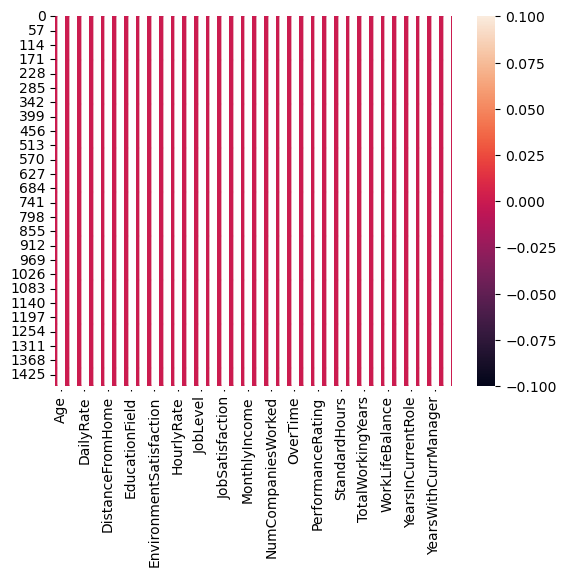

In [11]:
sns.heatmap(df.isnull(), annot = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [13]:
for i in df.columns:
    print(df[i].unique())
    print('\n')
    print(df[i].nunique())
    print('\n')

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


43


['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


3


[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 14

<Axes: xlabel='Gender', ylabel='Attrition'>

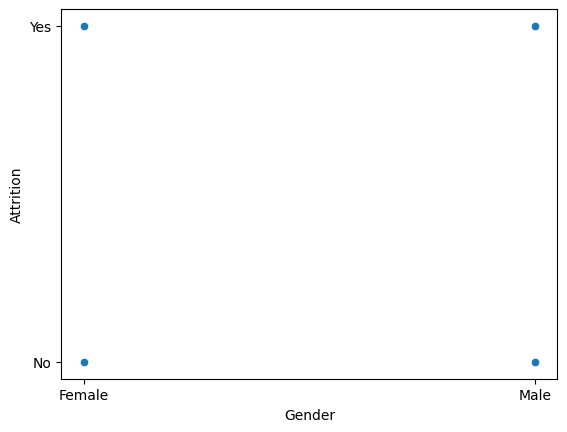

In [14]:
sns.scatterplot(y="Attrition",x="Gender",data=df)

From above graph we can say that, Attrition does not solely depend on gender of the employees.

<Axes: xlabel='Department', ylabel='MonthlyIncome'>

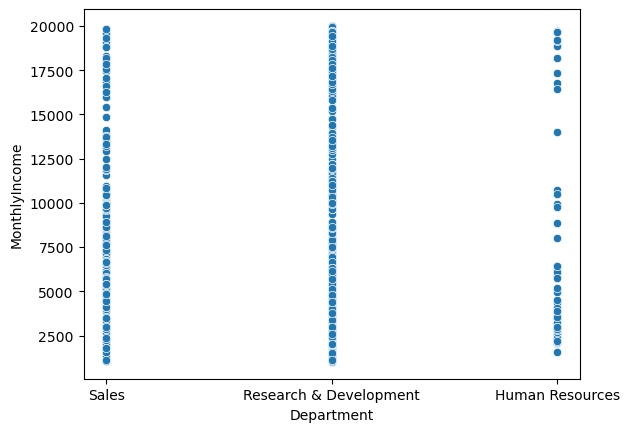

In [15]:
sns.scatterplot(y="MonthlyIncome",x="Department",data=df)

Both sales and R&D Department employees have monthly income in all ranges starting from 2500 to 20,000

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

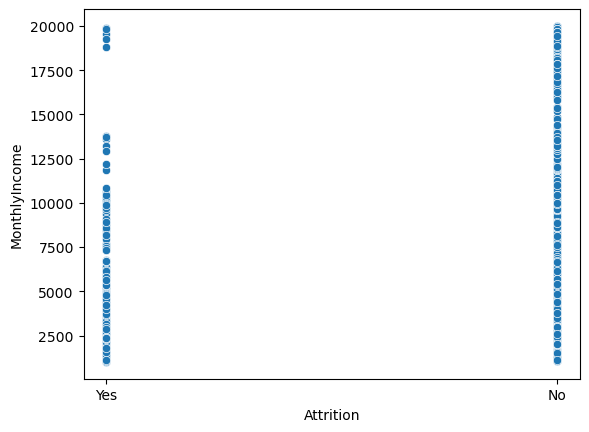

In [16]:
sns.scatterplot(x="Attrition",y="MonthlyIncome",data=df)

<Axes: xlabel='PercentSalaryHike', ylabel='MonthlyIncome'>

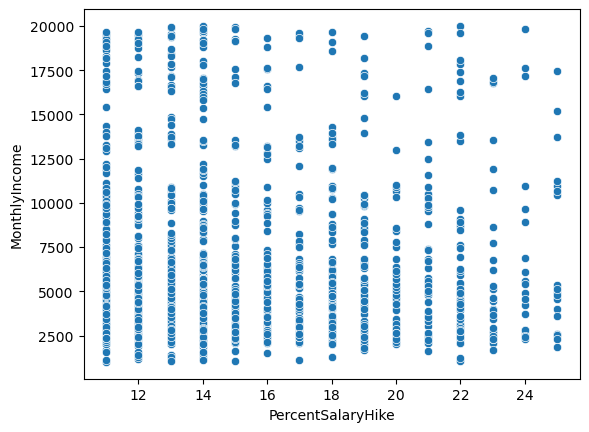

In [17]:
sns.scatterplot(x="PercentSalaryHike",y="MonthlyIncome",data=df)

<Axes: xlabel='TotalWorkingYears', ylabel='JobInvolvement'>

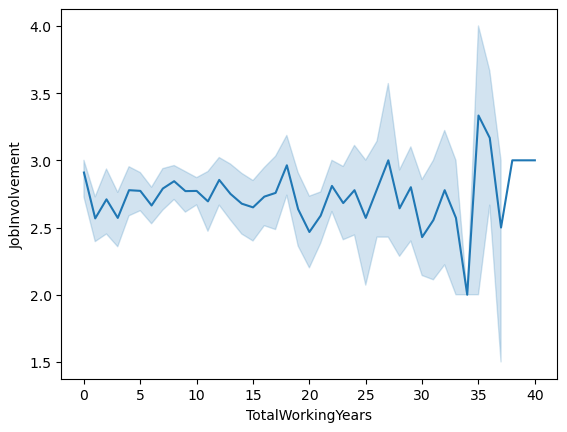

In [18]:
sns.lineplot(x="TotalWorkingYears",y="JobInvolvement",data=df)

<Axes: xlabel='Attrition', ylabel='OverTime'>

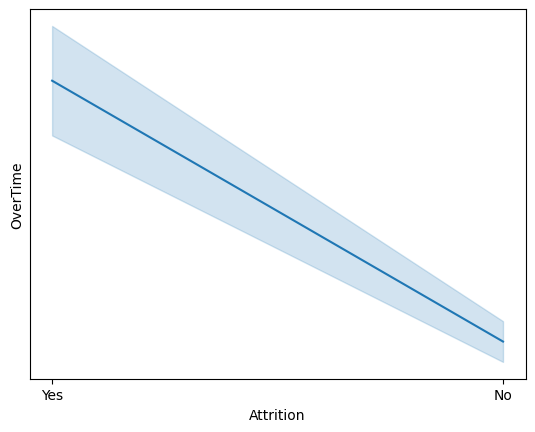

In [19]:
sns.lineplot(y="OverTime",x='Attrition',data=df)

Overtime and Attrition are inversely proportional to each other, when overtime is high, there is a high attrition

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

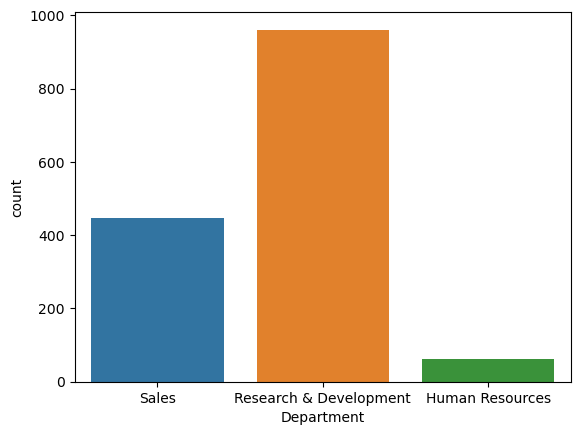

In [20]:
sns.countplot(x="Department", data = df)
df["Department"].value_counts()

The R&D dept has high count followed by sales and HR is the least.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

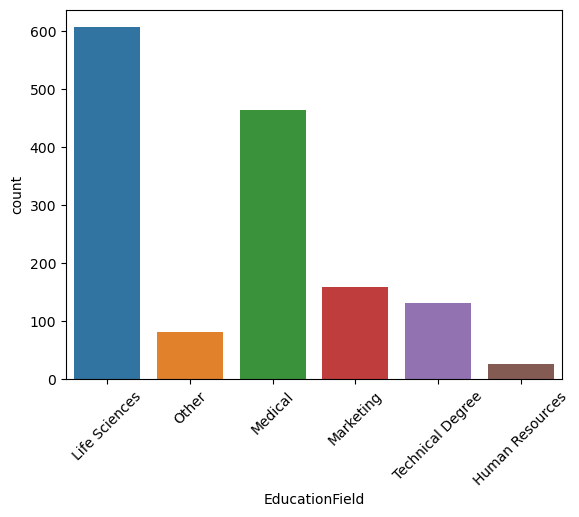

In [21]:
sns.countplot(x="EducationField", data = df)
df["EducationField"].value_counts()
plt.xticks(rotation=45)

The lifescience field has high count followed by medical field.

(array([0, 1, 2]),
 [Text(0, 0, 'Single'), Text(1, 0, 'Married'), Text(2, 0, 'Divorced')])

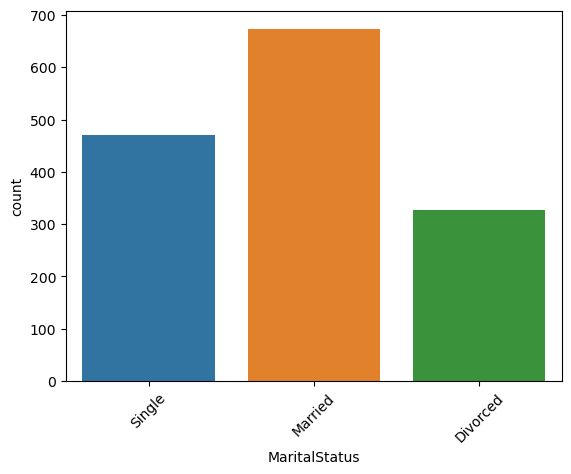

In [22]:
sns.countplot(x="MaritalStatus", data = df)
df["MaritalStatus"].value_counts()
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '11'),
  Text(1, 0, '12'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '15'),
  Text(5, 0, '16'),
  Text(6, 0, '17'),
  Text(7, 0, '18'),
  Text(8, 0, '19'),
  Text(9, 0, '20'),
  Text(10, 0, '21'),
  Text(11, 0, '22'),
  Text(12, 0, '23'),
  Text(13, 0, '24'),
  Text(14, 0, '25')])

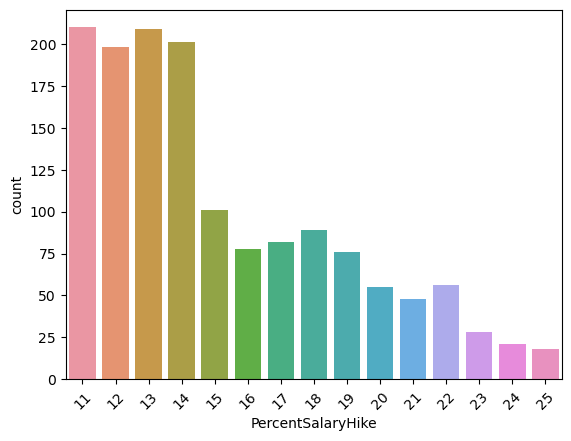

In [23]:
sns.countplot(x="PercentSalaryHike", data = df)
df["PercentSalaryHike"].value_counts()
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

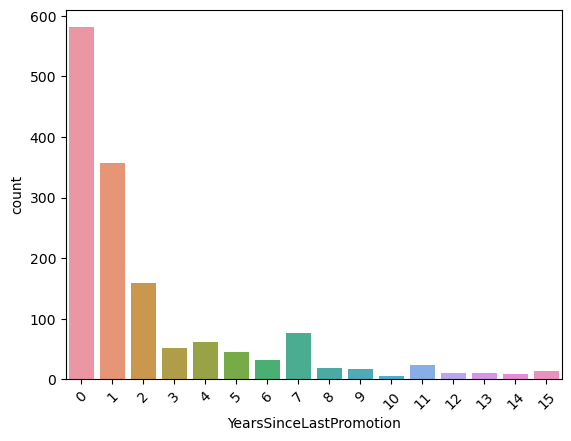

In [24]:
sns.countplot(x="YearsSinceLastPromotion", data = df)
df["YearsSinceLastPromotion"].value_counts()
plt.xticks(rotation=45)

<Axes: xlabel='Attrition', ylabel='RelationshipSatisfaction'>

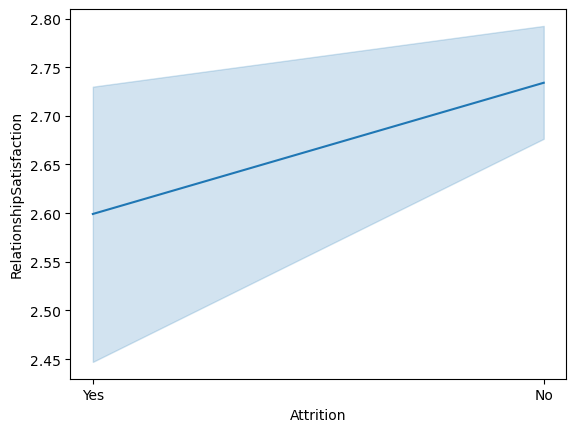

In [25]:
sns.lineplot(x="Attrition",y="RelationshipSatisfaction",data=df)

<Axes: xlabel='JobSatisfaction', ylabel='OverTime'>

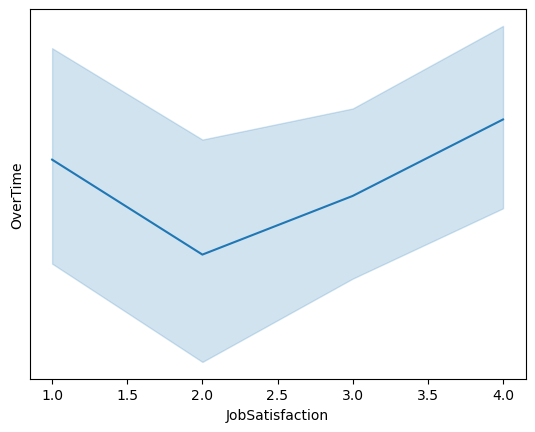

In [26]:
sns.lineplot(x="JobSatisfaction",y="OverTime",data=df)

<Axes: xlabel='MonthlyRate'>

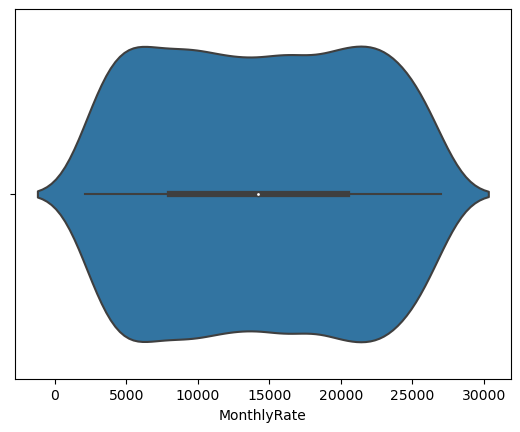

In [27]:
sns.violinplot(x="MonthlyRate",data=df)

<Axes: xlabel='TrainingTimesLastYear'>

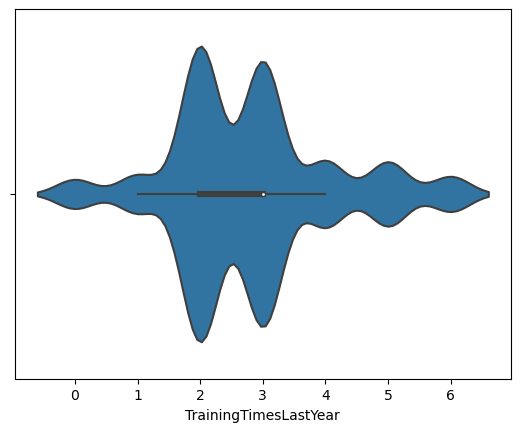

In [28]:
sns.violinplot(x="TrainingTimesLastYear",data=df)

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

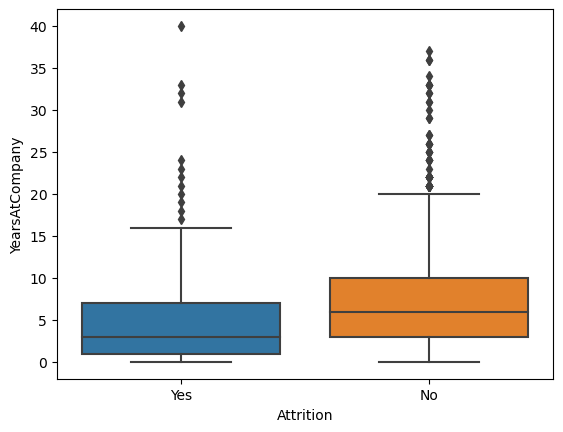

In [29]:
sns.boxplot(x="Attrition",y="YearsAtCompany",data=df)

<Axes: xlabel='Attrition', ylabel='WorkLifeBalance'>

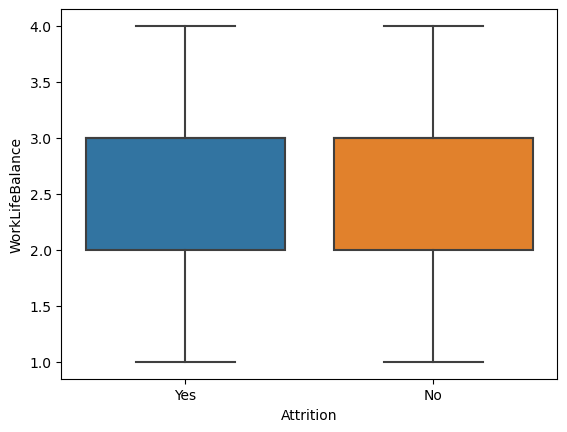

In [30]:
sns.boxplot(x="Attrition",y="WorkLifeBalance",data=df)

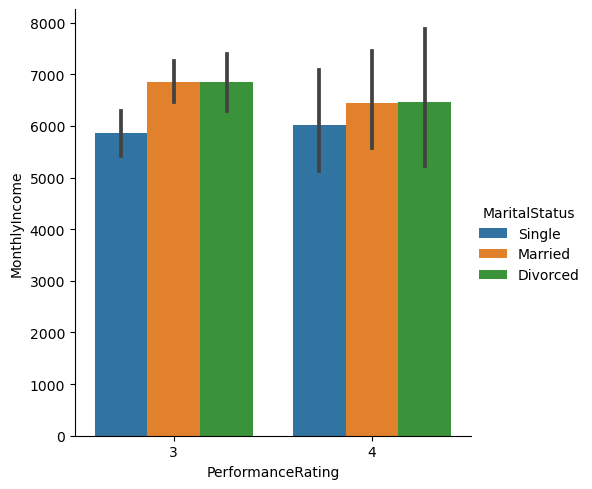

In [31]:
sns.catplot(y="MonthlyIncome",hue="MaritalStatus",x="PerformanceRating",data=df,kind="bar")

Divorced and Married category people have high monthly income when compared with single people.

In [32]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

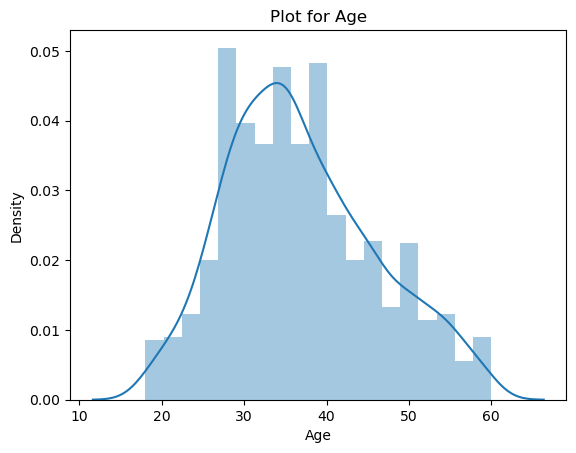

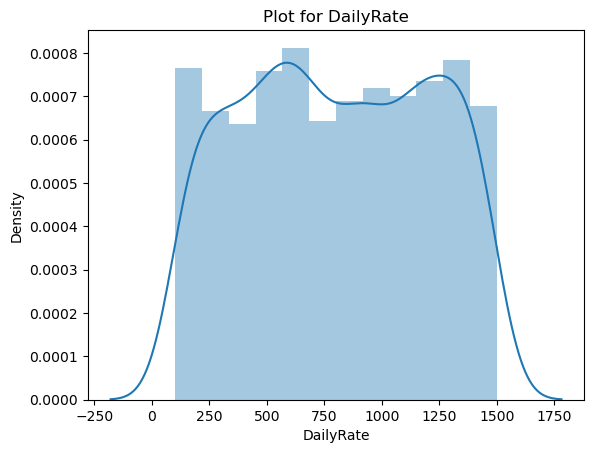

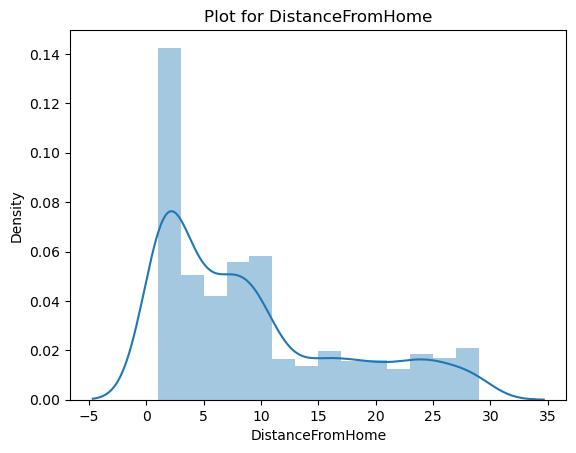

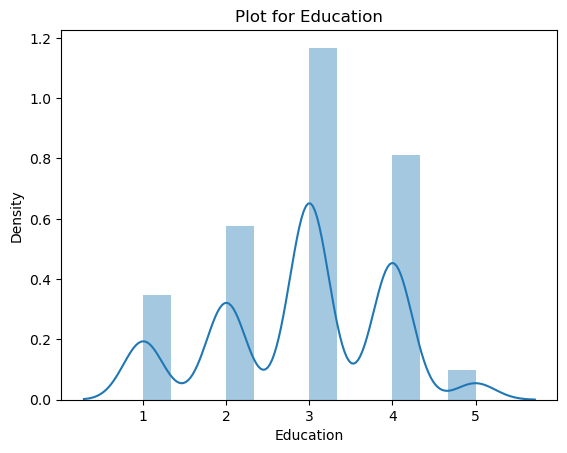

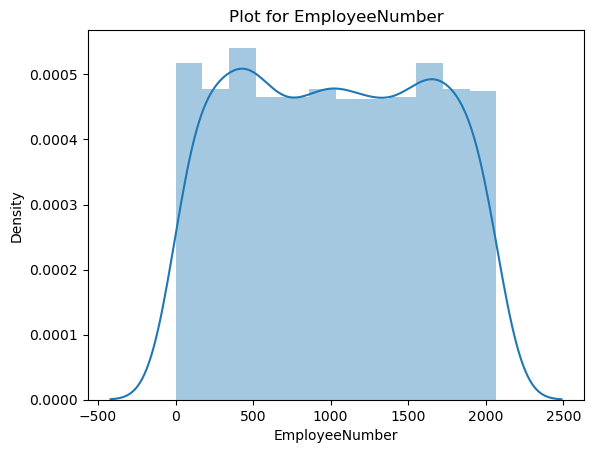

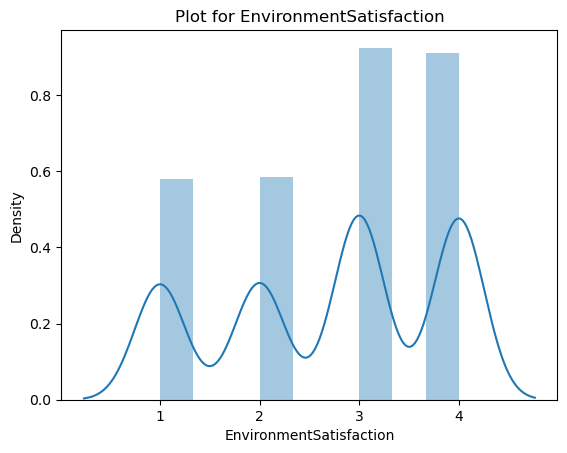

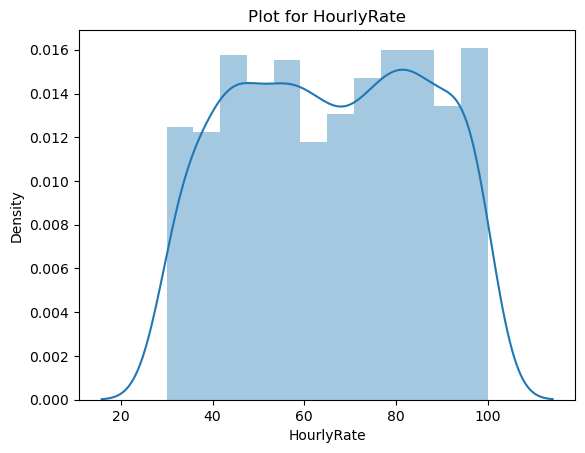

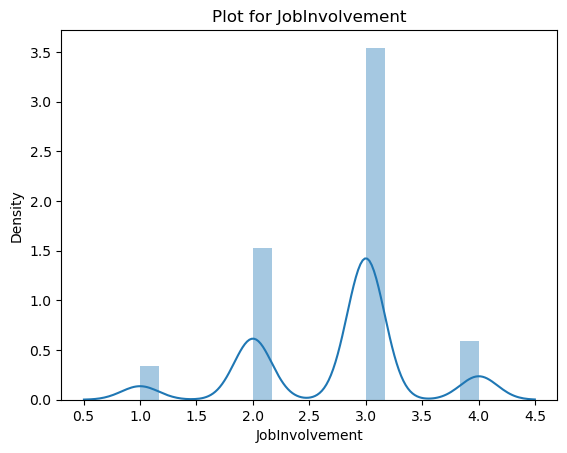

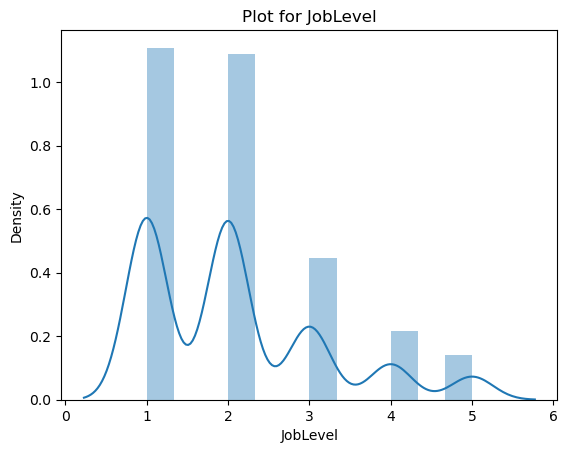

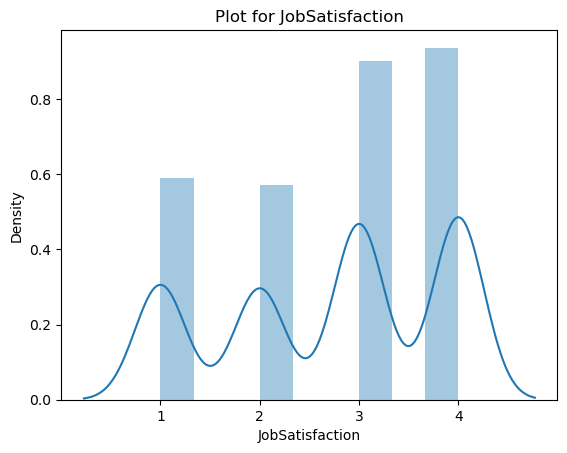

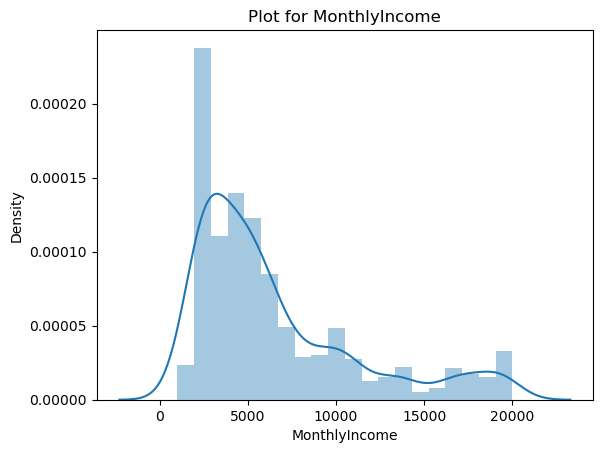

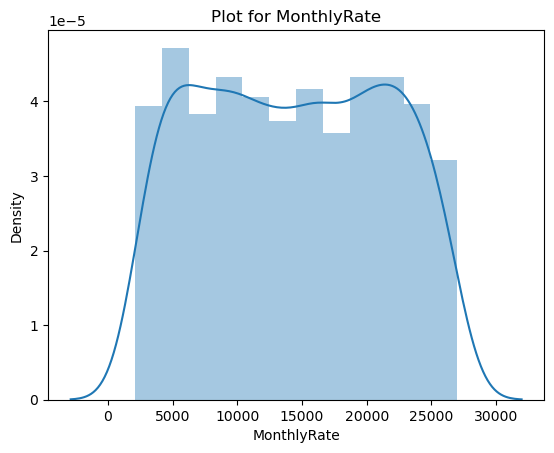

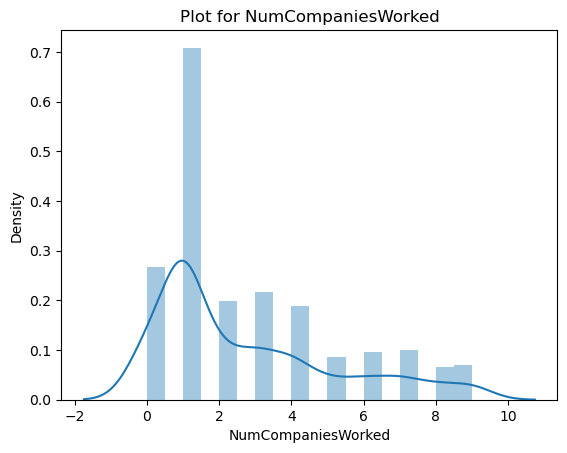

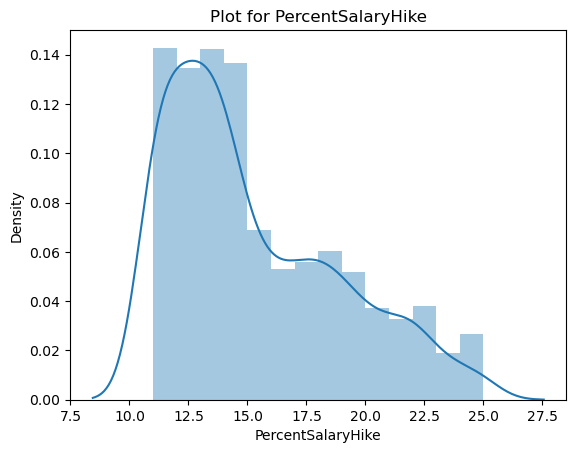

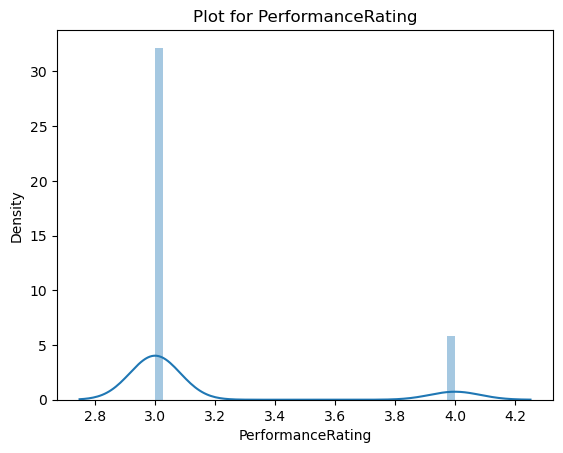

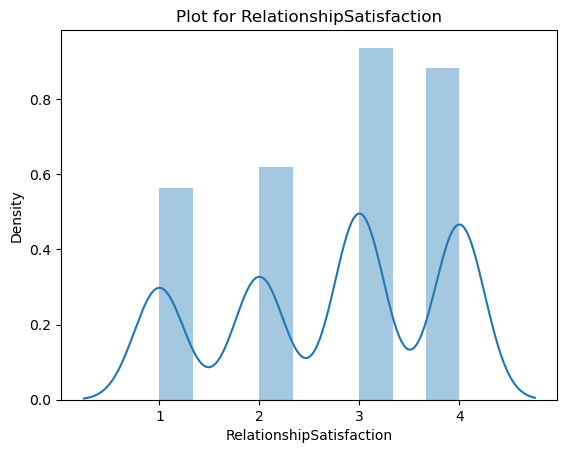

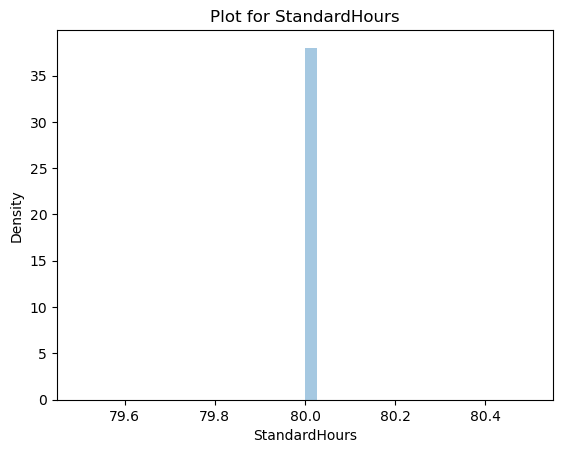

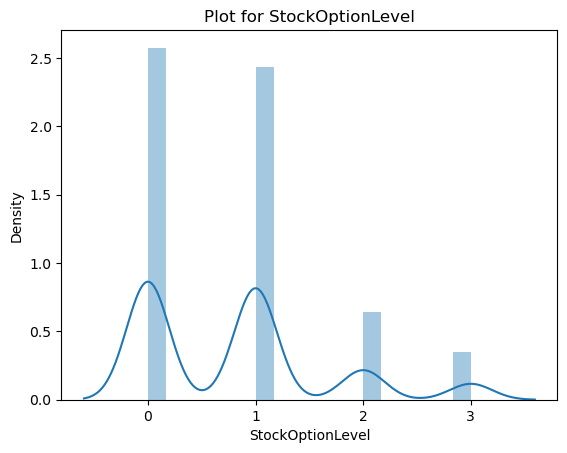

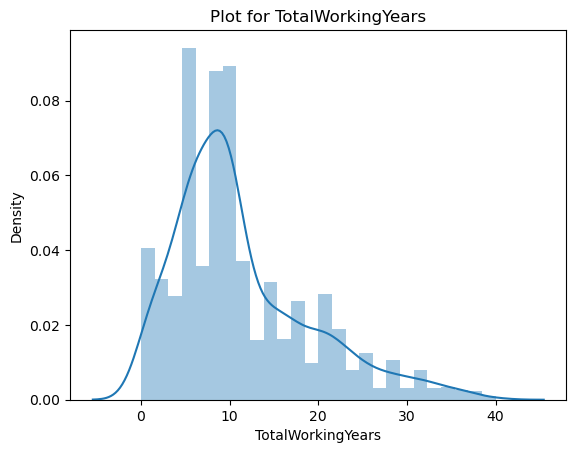

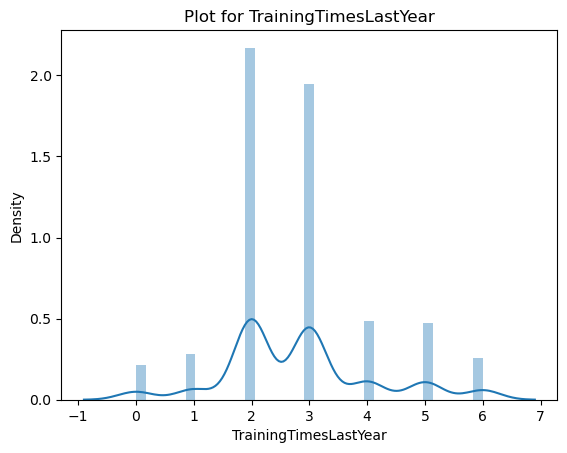

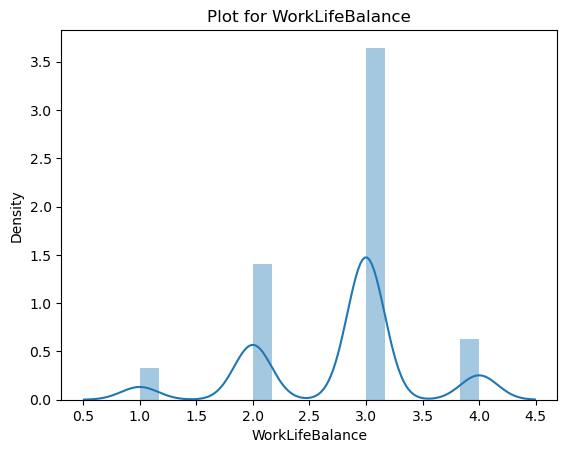

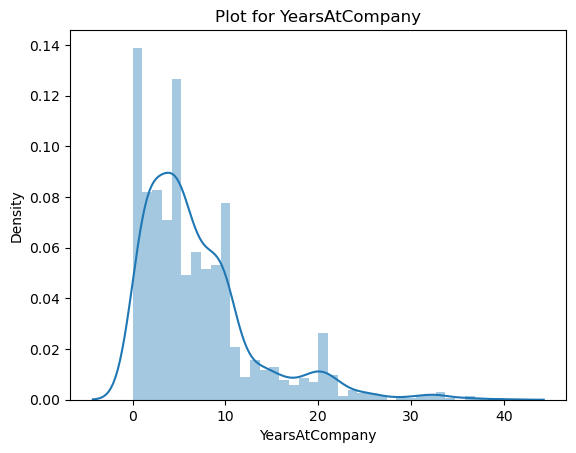

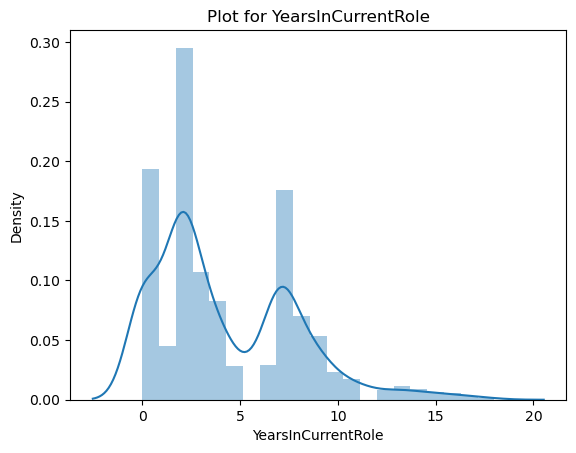

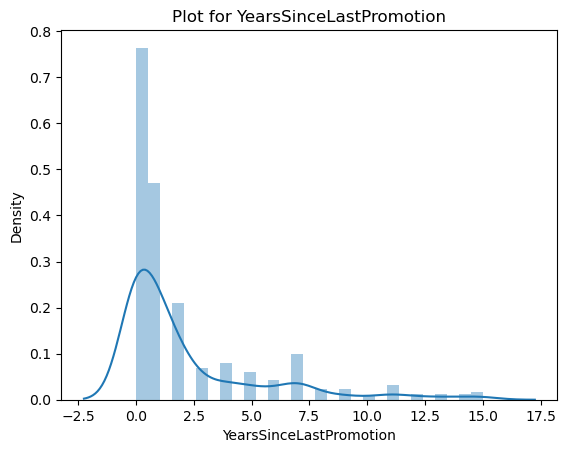

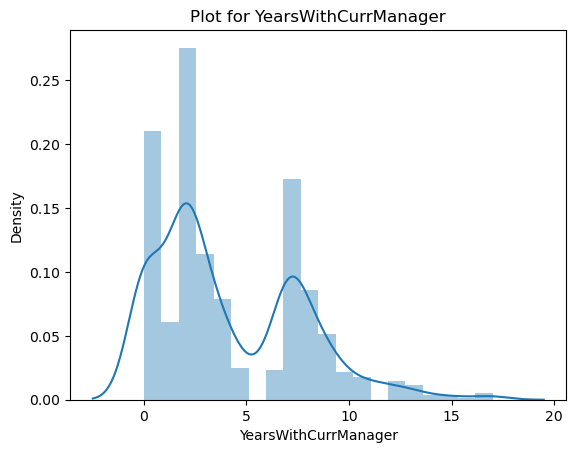

In [33]:
for column in df.columns:
    if df[column].dtype=="int64":
        sns.distplot(df[column])
        plt.title(f'Plot for {column}')
        plt.show()
        print("\n")

In [34]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,No


Dropping employee count column as it provides no relevance to the attrition column.

In [35]:
df=df.drop("EmployeeCount", axis=1)
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,...,80,0,17,3,2,9,6,0,8,No


# Checking for skewness

In [36]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,...,80,0,17,3,2,9,6,0,8,No


In [37]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [38]:
duplicates_exist = df.duplicated().any()

if duplicates_exist:
    print("There are duplicates in the dataset.")
else:
    print("There are no duplicates in the dataset.")

There are no duplicates in the dataset.


The default acceptable skew range is -0.52 to +0.52 , so here the columns which have skewness value way greater needs to be treated.

In [39]:
df["DistanceFromHome"] = np.cbrt(df["DistanceFromHome"])
df["JobLevel"] = np.cbrt(df["JobLevel"])
df["MonthlyIncome"] = np.cbrt(df["MonthlyIncome"])
df["NumCompaniesWorked"] = np.cbrt(df["NumCompaniesWorked"])
df["PercentSalaryHike"] = np.cbrt(df["PercentSalaryHike"])
df["PerformanceRating"] = np.cbrt(df["PerformanceRating"])
df["StockOptionLevel"] = np.cbrt(df["StockOptionLevel"])
df["TotalWorkingYears"] = np.cbrt(df["TotalWorkingYears"])
df["YearsAtCompany"] = np.cbrt(df["YearsAtCompany"])
df["YearsInCurrentRole"] = np.cbrt(df["YearsInCurrentRole"])
df["YearsSinceLastPromotion"] = np.cbrt(df["YearsSinceLastPromotion"])
df["YearsWithCurrManager"] = np.cbrt(df["YearsWithCurrManager"])

In [40]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.460775
JobSatisfaction            -0.329672
MonthlyIncome               0.677032
MonthlyRate                 0.018578
NumCompaniesWorked         -0.699002
PercentSalaryHike           0.601248
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole         -0.866884
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -0.820395
dtype: float64

In [41]:
from scipy.stats import boxcox 

df['PerformanceRating'], _ = boxcox(df['PerformanceRating'] + 1) 

In [42]:
df['NumCompaniesWorked'] = np.square(df['NumCompaniesWorked'])
df['YearsInCurrentRole'] = np.square(df['YearsInCurrentRole'])
df['YearsWithCurrManager'] = np.square(df['YearsWithCurrManager'])

In [43]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.460775
JobSatisfaction            -0.329672
MonthlyIncome               0.677032
MonthlyRate                 0.018578
NumCompaniesWorked          0.494635
PercentSalaryHike           0.601248
PerformanceRating           0.000000
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole          0.226548
YearsSinceLastPromotion     0.198634
YearsWithCurrManager        0.191857
dtype: float64

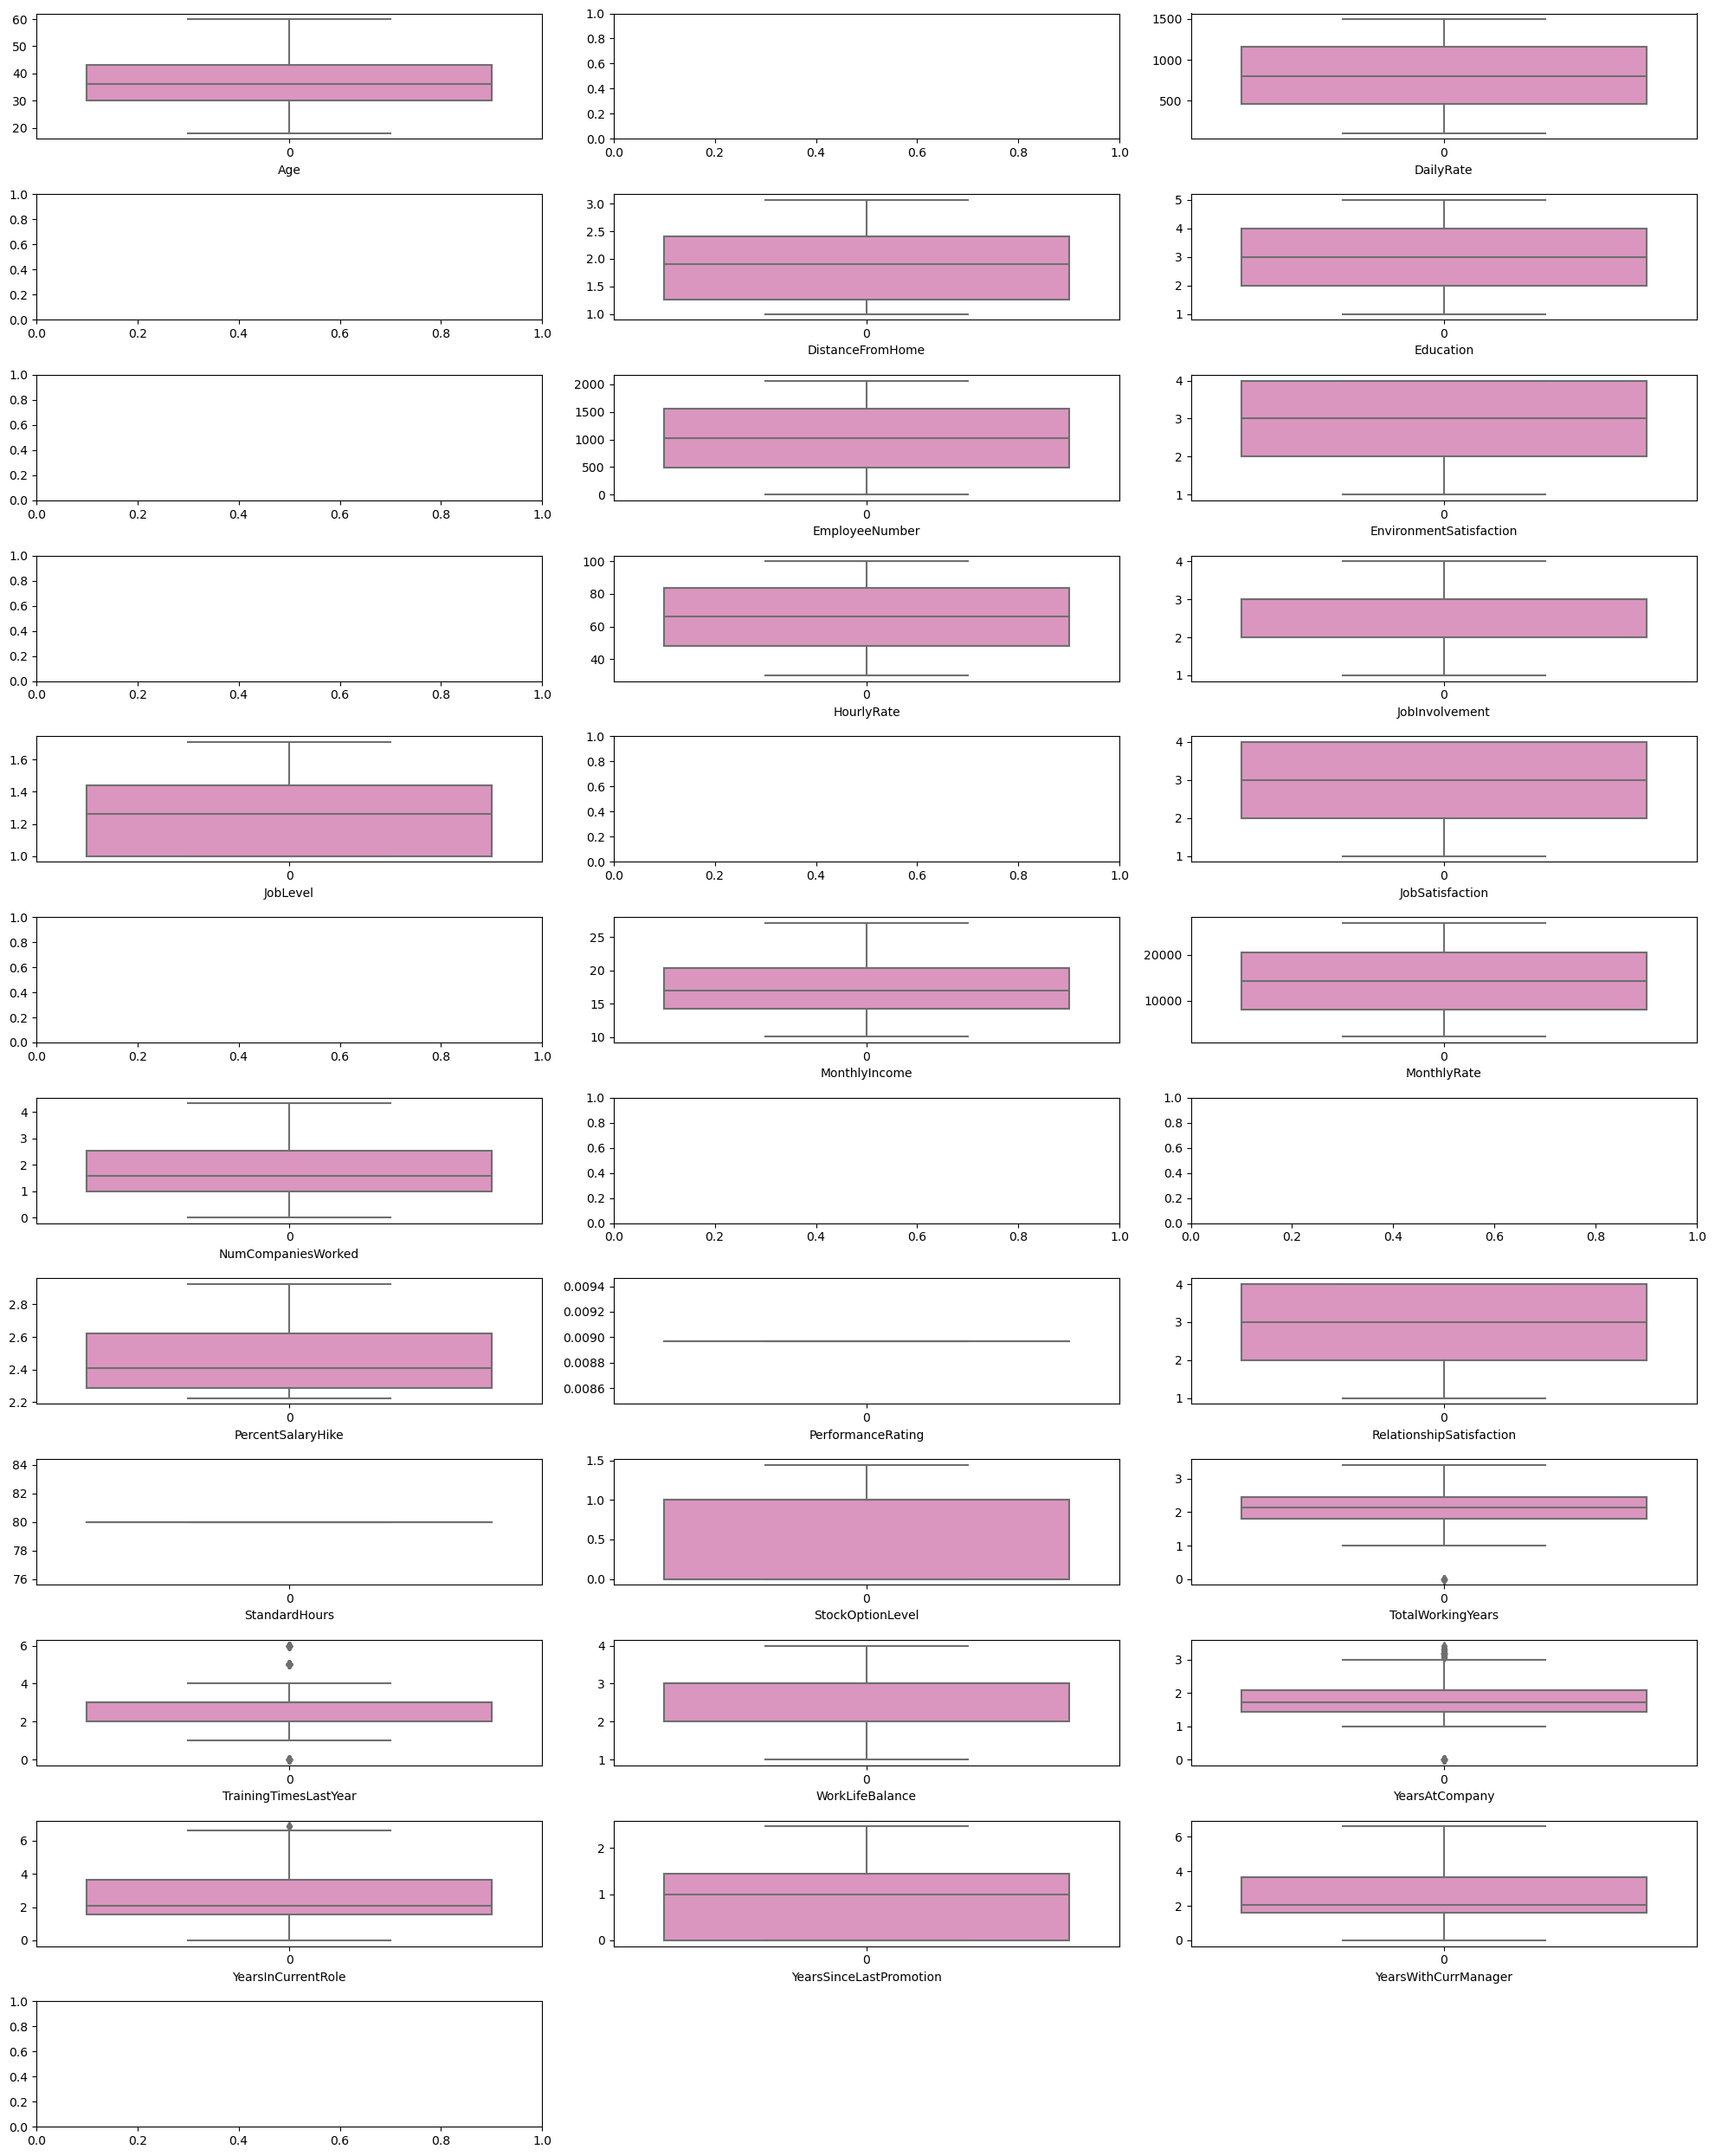

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))
p = 1

for i in df.columns:
    if p <= 36:
        plt.subplot(12, 3, p)

        if df[i].dtype in ['float64', 'int64']:
            sns.boxplot(df[i], palette='Set2_r')
            plt.xlabel(i)
    p += 1

plt.tight_layout()
plt.show()

In [45]:
#checking outliers using z score
from scipy.stats import zscore 
out_features = df[['Age','DailyRate','DistanceFromHome','Education', 'EmployeeNumber', 'EnvironmentSatisfaction','HourlyRate','JobInvolvement', 'JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
z=np.abs(zscore(out_features))
z

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,1.412629,0.891688,1.701283,0.660531,1.383138,0.379672,0.112332,1.153254,...,1.584178,NaN,1.127326,0.204222,2.171982,2.493820,0.127705,0.111934,1.110010,0.402339
1,1.322365,1.297775,0.159829,1.868426,1.699621,0.254625,0.240677,1.026167,0.112332,0.660853,...,1.191438,NaN,0.678540,0.076388,0.155707,0.338096,0.703698,0.839589,0.198021,0.871018
2,0.008343,1.414363,1.003914,0.891688,1.696298,1.169781,1.284725,1.026167,1.092520,0.246200,...,0.658973,NaN,1.127326,0.362426,0.155707,0.338096,2.975183,1.497223,1.110010,1.461454
3,0.429664,1.461466,0.717210,1.061787,1.694636,1.169781,0.486709,0.379672,1.092520,0.246200,...,0.266233,NaN,1.127326,0.204222,0.155707,0.338096,0.439987,0.839589,0.776497,1.461454
4,1.086676,0.524295,1.003914,1.868426,1.691313,1.575686,1.274014,0.379672,1.092520,0.660853,...,1.191438,NaN,0.678540,0.536515,0.155707,0.338096,0.823761,0.483518,0.538006,0.449631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.202082,1.486775,0.891688,1.721670,0.254625,1.224807,1.785511,0.112332,1.153254,...,0.266233,NaN,0.678540,0.833802,0.155707,0.338096,0.055254,0.483518,1.110010,0.135591
1466,0.227347,0.469754,0.127741,1.868426,1.723332,1.169781,1.175601,1.026167,0.957508,1.567907,...,1.584178,NaN,0.678540,0.058709,1.707500,0.338096,0.291310,0.839589,0.198021,0.871018
1467,1.086676,1.605183,0.488966,0.085049,1.726655,0.660531,1.038693,1.785511,0.112332,0.660853,...,0.658973,NaN,0.678540,0.536515,2.171982,0.338096,0.127705,0.483518,1.110010,0.135591
1468,1.322365,0.546677,1.003914,0.085049,1.728317,1.169781,0.142264,1.026167,0.112332,0.660853,...,1.191438,NaN,1.127326,0.833802,0.155707,1.077862,0.576737,0.611369,1.110010,1.088179


In [46]:
np.where(z>3)

(array([  23,  127,  296,  301,  457,  615,  727,  828,  972, 1153, 1311],
       dtype=int64),
 array([18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18], dtype=int64))

Only 1 row, so ignoring it.

In [47]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1.000000,2,Life Sciences,1,2,Female,...,80,0.0,2.000000,0,1,1.817121,2.519842,0.000000,2.924018,Yes
1,49,Travel_Frequently,279,Research & Development,2.000000,1,Life Sciences,2,3,Male,...,80,1.0,2.154435,3,3,2.154435,3.659306,1.000000,3.659306,No
2,37,Travel_Rarely,1373,Research & Development,1.259921,2,Other,4,4,Male,...,80,0.0,1.912931,3,3,0.000000,0.000000,0.000000,0.000000,Yes
3,33,Travel_Frequently,1392,Research & Development,1.442250,4,Life Sciences,5,4,Female,...,80,0.0,2.000000,3,3,2.000000,3.659306,1.442250,0.000000,No
4,27,Travel_Rarely,591,Research & Development,1.259921,1,Medical,7,1,Male,...,80,1.0,1.817121,3,3,1.259921,1.587401,1.259921,1.587401,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,2.843867,2,Medical,2061,3,Male,...,80,1.0,2.571282,3,3,1.709976,1.587401,0.000000,2.080084,No
1466,39,Travel_Rarely,613,Research & Development,1.817121,1,Medical,2062,4,Male,...,80,1.0,2.080084,5,3,1.912931,3.659306,1.000000,3.659306,No
1467,27,Travel_Rarely,155,Research & Development,1.587401,3,Life Sciences,2064,2,Male,...,80,1.0,1.817121,0,3,1.817121,1.587401,0.000000,2.080084,No
1468,49,Travel_Frequently,1023,Sales,1.259921,3,Medical,2065,4,Male,...,80,0.0,2.571282,3,2,2.080084,3.301927,0.000000,4.000000,No


# Checking correlation

In [48]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1.000000,2,Life Sciences,1,2,Female,...,80,0.0,2.000000,0,1,1.817121,2.519842,0.000000,2.924018,Yes
1,49,Travel_Frequently,279,Research & Development,2.000000,1,Life Sciences,2,3,Male,...,80,1.0,2.154435,3,3,2.154435,3.659306,1.000000,3.659306,No
2,37,Travel_Rarely,1373,Research & Development,1.259921,2,Other,4,4,Male,...,80,0.0,1.912931,3,3,0.000000,0.000000,0.000000,0.000000,Yes
3,33,Travel_Frequently,1392,Research & Development,1.442250,4,Life Sciences,5,4,Female,...,80,0.0,2.000000,3,3,2.000000,3.659306,1.442250,0.000000,No
4,27,Travel_Rarely,591,Research & Development,1.259921,1,Medical,7,1,Male,...,80,1.0,1.817121,3,3,1.259921,1.587401,1.259921,1.587401,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,2.843867,2,Medical,2061,3,Male,...,80,1.0,2.571282,3,3,1.709976,1.587401,0.000000,2.080084,No
1466,39,Travel_Rarely,613,Research & Development,1.817121,1,Medical,2062,4,Male,...,80,1.0,2.080084,5,3,1.912931,3.659306,1.000000,3.659306,No
1467,27,Travel_Rarely,155,Research & Development,1.587401,3,Life Sciences,2064,2,Male,...,80,1.0,1.817121,0,3,1.817121,1.587401,0.000000,2.080084,No
1468,49,Travel_Frequently,1023,Sales,1.259921,3,Medical,2065,4,Male,...,80,0.0,2.571282,3,2,2.080084,3.301927,0.000000,4.000000,No


In [49]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
    
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2.0,1102,2.0,1.000000,2,1.0,1,2,0.0,...,80,0.0,2.000000,0,1,1.817121,2.519842,0.000000,2.924018,1.0
1,49,1.0,279,1.0,2.000000,1,1.0,2,3,1.0,...,80,1.0,2.154435,3,3,2.154435,3.659306,1.000000,3.659306,0.0
2,37,2.0,1373,1.0,1.259921,2,4.0,4,4,1.0,...,80,0.0,1.912931,3,3,0.000000,0.000000,0.000000,0.000000,1.0
3,33,1.0,1392,1.0,1.442250,4,1.0,5,4,0.0,...,80,0.0,2.000000,3,3,2.000000,3.659306,1.442250,0.000000,0.0
4,27,2.0,591,1.0,1.259921,1,3.0,7,1,1.0,...,80,1.0,1.817121,3,3,1.259921,1.587401,1.259921,1.587401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,2.843867,2,3.0,2061,3,1.0,...,80,1.0,2.571282,3,3,1.709976,1.587401,0.000000,2.080084,0.0
1466,39,2.0,613,1.0,1.817121,1,3.0,2062,4,1.0,...,80,1.0,2.080084,5,3,1.912931,3.659306,1.000000,3.659306,0.0
1467,27,2.0,155,1.0,1.587401,3,1.0,2064,2,1.0,...,80,1.0,1.817121,0,3,1.817121,1.587401,0.000000,2.080084,0.0
1468,49,1.0,1023,2.0,1.259921,3,3.0,2065,4,1.0,...,80,0.0,2.571282,3,2,2.080084,3.301927,0.000000,4.000000,0.0


In [50]:
cor = df.corr()
cor

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.024751,0.010661,-0.031882,-0.017521,0.208034,-0.040873,-0.010145,0.010146,-0.036311,...,NaN,0.072386,0.670212,-0.019621,-0.021490,0.277599,0.202676,0.178217,0.191176,-0.159205
BusinessTravel,0.024751,1.000000,-0.004086,-0.009044,-0.012196,0.000757,0.023724,-0.015578,0.004174,-0.032981,...,NaN,-0.015151,0.045264,0.015240,-0.011256,-0.002484,-0.017918,-0.030144,-0.019331,0.000074
DailyRate,0.010661,-0.004086,1.000000,0.007109,-0.003634,-0.016806,0.037709,-0.050990,0.018355,-0.011716,...,NaN,0.039363,0.023035,0.002453,-0.037848,-0.011387,0.010562,-0.038943,-0.010442,-0.056652
Department,-0.031882,-0.009044,0.007109,1.000000,0.026189,0.007996,0.013720,-0.010895,-0.019395,-0.041583,...,NaN,-0.013589,-0.008491,0.036875,0.026383,0.011446,0.052145,0.018416,0.027933,0.063991
DistanceFromHome,-0.017521,-0.012196,-0.003634,0.026189,1.000000,0.019881,0.007214,0.035129,-0.010800,0.005271,...,NaN,0.025370,-0.001288,-0.022502,-0.024142,0.009052,0.015123,0.001563,0.009416,0.079090
Education,0.208034,0.000757,-0.016806,0.007996,0.019881,1.000000,-0.039592,0.042070,-0.027128,-0.016547,...,NaN,0.015091,0.170609,-0.025100,0.009819,0.061038,0.059739,0.030448,0.061609,-0.031373
EducationField,-0.040873,0.023724,0.037709,0.013720,0.007214,-0.039592,1.000000,-0.002516,0.043163,-0.002504,...,NaN,-0.018380,-0.016817,0.049195,0.041191,-0.006638,-0.002275,0.010138,0.006071,0.026846
EmployeeNumber,-0.010145,-0.015578,-0.050990,-0.010895,0.035129,0.042070,-0.002516,1.000000,0.017621,0.022556,...,NaN,0.055034,-0.003171,0.023603,0.010309,0.008860,-0.003235,0.009250,-0.004313,-0.010577
EnvironmentSatisfaction,0.010146,0.004174,0.018355,-0.019395,-0.010800,-0.027128,0.043163,0.017621,1.000000,0.000508,...,NaN,0.017266,-0.019455,-0.019359,0.027627,0.004573,0.017704,0.031155,-0.002235,-0.103369
Gender,-0.036311,-0.032981,-0.011716,-0.041583,0.005271,-0.016547,-0.002504,0.022556,0.000508,1.000000,...,NaN,0.009909,-0.042755,-0.038787,-0.002753,-0.041344,-0.040223,-0.024327,-0.028172,0.029453


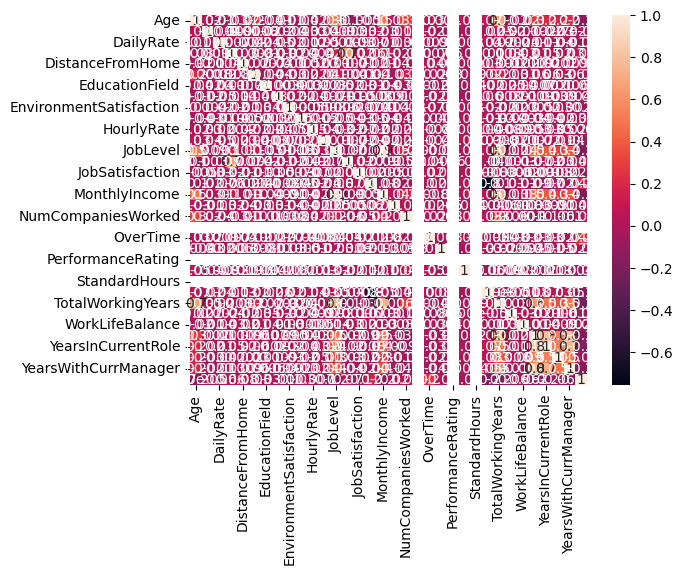

<Figure size 1600x1400 with 0 Axes>

<Figure size 1600x1400 with 0 Axes>

In [51]:
sns.heatmap(df.corr(), annot = True, fmt = ".1g")
plt.show()
plt.figure(figsize=(16, 14))

In [52]:
cor['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.079090
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.042552
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.016248
Education                  -0.031373
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.055223
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
Age                        -0.159205
YearsInCurrentRole         -0.178008
YearsWithCurrManager       -0.178042
StockOptionLevel           -0.184391
M

Dropping the last three columns as they dont have numerical correlation with the target variable.

In [53]:
df=df.drop(['Over18', 'PerformanceRating', 'StandardHours'], axis=1)
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2.0,1102,2.0,1.000000,2,1.0,1,2,0.0,...,1,0.0,2.000000,0,1,1.817121,2.519842,0.000000,2.924018,1.0
1,49,1.0,279,1.0,2.000000,1,1.0,2,3,1.0,...,4,1.0,2.154435,3,3,2.154435,3.659306,1.000000,3.659306,0.0
2,37,2.0,1373,1.0,1.259921,2,4.0,4,4,1.0,...,2,0.0,1.912931,3,3,0.000000,0.000000,0.000000,0.000000,1.0
3,33,1.0,1392,1.0,1.442250,4,1.0,5,4,0.0,...,3,0.0,2.000000,3,3,2.000000,3.659306,1.442250,0.000000,0.0
4,27,2.0,591,1.0,1.259921,1,3.0,7,1,1.0,...,4,1.0,1.817121,3,3,1.259921,1.587401,1.259921,1.587401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,2.843867,2,3.0,2061,3,1.0,...,3,1.0,2.571282,3,3,1.709976,1.587401,0.000000,2.080084,0.0
1466,39,2.0,613,1.0,1.817121,1,3.0,2062,4,1.0,...,1,1.0,2.080084,5,3,1.912931,3.659306,1.000000,3.659306,0.0
1467,27,2.0,155,1.0,1.587401,3,1.0,2064,2,1.0,...,2,1.0,1.817121,0,3,1.817121,1.587401,0.000000,2.080084,0.0
1468,49,1.0,1023,2.0,1.259921,3,3.0,2065,4,1.0,...,4,0.0,2.571282,3,2,2.080084,3.301927,0.000000,4.000000,0.0


# Feature scaling and standardisation

In [54]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2.0,1102,2.0,1.000000,2,1.0,1,2,0.0,...,1,0.0,2.000000,0,1,1.817121,2.519842,0.000000,2.924018,1.0
1,49,1.0,279,1.0,2.000000,1,1.0,2,3,1.0,...,4,1.0,2.154435,3,3,2.154435,3.659306,1.000000,3.659306,0.0
2,37,2.0,1373,1.0,1.259921,2,4.0,4,4,1.0,...,2,0.0,1.912931,3,3,0.000000,0.000000,0.000000,0.000000,1.0
3,33,1.0,1392,1.0,1.442250,4,1.0,5,4,0.0,...,3,0.0,2.000000,3,3,2.000000,3.659306,1.442250,0.000000,0.0
4,27,2.0,591,1.0,1.259921,1,3.0,7,1,1.0,...,4,1.0,1.817121,3,3,1.259921,1.587401,1.259921,1.587401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,2.843867,2,3.0,2061,3,1.0,...,3,1.0,2.571282,3,3,1.709976,1.587401,0.000000,2.080084,0.0
1466,39,2.0,613,1.0,1.817121,1,3.0,2062,4,1.0,...,1,1.0,2.080084,5,3,1.912931,3.659306,1.000000,3.659306,0.0
1467,27,2.0,155,1.0,1.587401,3,1.0,2064,2,1.0,...,2,1.0,1.817121,0,3,1.817121,1.587401,0.000000,2.080084,0.0
1468,49,1.0,1023,2.0,1.259921,3,3.0,2065,4,1.0,...,4,0.0,2.571282,3,2,2.080084,3.301927,0.000000,4.000000,0.0


In [55]:
x=df.drop("Attrition", axis=1)
y=df['Attrition']

In [56]:
x.shape

(1470, 30)

In [57]:
y.shape

(1470,)

# Standard scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.412629,-0.891688,-0.937414,-1.701283,-0.660531,-1.224745,...,-1.251446,-1.584178,-1.127326,-0.204222,-2.171982,-2.493820,0.127705,0.111934,-1.110010,0.402339
1,1.322365,-0.913194,-1.297775,-0.493817,0.159829,-1.868426,-0.937414,-1.699621,0.254625,0.816497,...,1.997861,1.191438,0.678540,0.076388,0.155707,0.338096,0.703698,0.839589,0.198021,0.871018
2,0.008343,0.590048,1.414363,-0.493817,-1.003914,-0.891688,1.316673,-1.696298,1.169781,0.816497,...,0.018279,-0.658973,-1.127326,-0.362426,0.155707,0.338096,-2.975183,-1.497223,-1.110010,-1.461454
3,-0.429664,-0.913194,1.461466,-0.493817,-0.717210,1.061787,-0.937414,-1.694636,1.169781,-1.224745,...,-1.251446,0.266233,-1.127326,-0.204222,0.155707,0.338096,0.439987,0.839589,0.776497,-1.461454
4,-1.086676,0.590048,-0.524295,-0.493817,-1.003914,-1.868426,0.565311,-1.691313,-1.575686,0.816497,...,-0.908380,1.191438,0.678540,-0.536515,0.155707,0.338096,-0.823761,-0.483518,0.538006,-0.449631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.486775,-0.891688,0.565311,1.721670,0.254625,0.816497,...,0.569030,0.266233,0.678540,0.833802,0.155707,0.338096,-0.055254,-0.483518,-1.110010,-0.135591
1466,0.227347,0.590048,-0.469754,-0.493817,-0.127741,-1.868426,0.565311,1.723332,1.169781,0.816497,...,0.018279,-1.584178,0.678540,-0.058709,1.707500,0.338096,0.291310,0.839589,0.198021,0.871018
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.488966,0.085049,-0.937414,1.726655,-0.660531,0.816497,...,1.319317,-0.658973,0.678540,-0.536515,-2.171982,0.338096,0.127705,-0.483518,-1.110010,-0.135591
1468,1.322365,-0.913194,0.546677,1.401512,-1.003914,0.085049,0.565311,1.728317,1.169781,0.816497,...,-0.275626,1.191438,-1.127326,0.833802,0.155707,-1.077862,0.576737,0.611369,-1.110010,1.088179


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,2.019253,Age
1,1.020019,BusinessTravel
2,1.024234,DailyRate
3,1.969246,Department
4,1.015662,DistanceFromHome
5,1.065652,Education
6,1.017472,EducationField
7,1.023750,EmployeeNumber
8,1.022622,EnvironmentSatisfaction
9,1.021663,Gender


In [60]:
y.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

There is a class imbalance issue, lets sample that.

In [61]:
!pip install imblearn 
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [62]:
!pip install --upgrade scikit-learn

In [63]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


In [64]:
import imblearn
import sklearn
print(imblearn.__version__)
print(sklearn.__version__)

0.12.0
1.4.0


In [65]:
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [66]:
y1.value_counts()

1.0    1233
0.0    1233
Name: Attrition, dtype: int64

# Finding best random state.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR  = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)
    

Best accuracy is 0.9581081081081081 at random state 195


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = rs) 


In [70]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

In [71]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9540540540540541
[[364  11]
 [ 23 342]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       375
         1.0       0.97      0.94      0.95       365

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740



In [72]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9783783783783784
[[367   8]
 [  8 357]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       375
         1.0       0.98      0.98      0.98       365

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740



In [73]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7959459459459459
[[286  89]
 [ 62 303]]
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       375
         1.0       0.77      0.83      0.80       365

    accuracy                           0.80       740
   macro avg       0.80      0.80      0.80       740
weighted avg       0.80      0.80      0.80       740



In [74]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9162162162162162
[[331  44]
 [ 18 347]]
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91       375
         1.0       0.89      0.95      0.92       365

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



In [75]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8891891891891892
[[327  48]
 [ 34 331]]
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       375
         1.0       0.87      0.91      0.89       365

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



In [76]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9148648648648648
[[353  22]
 [ 41 324]]
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       375
         1.0       0.94      0.89      0.91       365

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740



In [77]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9351351351351351
[[353  22]
 [ 41 324]]
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       375
         1.0       0.94      0.89      0.91       365

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740



# Cross val

In [78]:
#Random forest 
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predRFC)-score.mean())

[0.79149798 0.96551724 0.96551724 0.95943205 0.71805274]
0.8800034490970756
Difference is 0.07405060495697846


In [79]:
#Extra Trees
score = cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predETC)-score.mean())

[0.92105263 0.97160243 0.97363083 0.97363083 0.96551724]
0.9610867940642681
Difference is 0.017291584314110264


In [80]:
#Logistic regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predLR)-score.mean())

[0.67004049 0.78701826 0.80121704 0.74239351 0.72819473]
0.7457728030483449
Difference is 0.050173142897601


In [81]:
#SVC
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predsvc)-score.mean())

[0.86842105 0.92697769 0.92900609 0.89858012 0.91075051]
0.9067470908508592
Difference is 0.009469125365356934


In [82]:
#Adaboost
score = cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predABC)-score.mean())

[0.19433198 0.84381339 0.83772819 0.78093306 0.48275862]
0.6279130499051498
Difference is 0.26127613928403937


In [83]:
#Bagging
score = cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predBC)-score.mean())

[0.65182186 0.93711968 0.93914807 0.9127789  0.56795132]
0.8017639667901225
Difference is 0.11310089807474233


In [84]:
#Gradient boosting
score = cross_val_score(GBC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predGBC)-score.mean())

[0.58097166 0.85598377 0.77281947 0.82150101 0.52941176]
0.7121375368519598
Difference is 0.22299759828317534


After analysing indicidual score and mean for each algorithm, deciding extra trees classifier as the best agorithm

# Hyperparameter tuning

In [85]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini','entropy'],
              'random_state':[10,50,5000],
              'max_depth' : [0,10,30], 
              'n_jobs' : [-2,-1,1], 
              'n_estimators':[50,100,150,200,350]}

In [86]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5, n_jobs=1)

In [87]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 30],
                         'n_estimators': [50, 100, 150, 200, 350],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 5000]})

In [88]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 5000}

In [89]:
final_model = ExtraTreesClassifier(criterion='gini', max_depth = 30, n_estimators=150, n_jobs=-2, random_state=5000)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(str(acc*100) + "%")

97.83783783783784%


# ROC curve

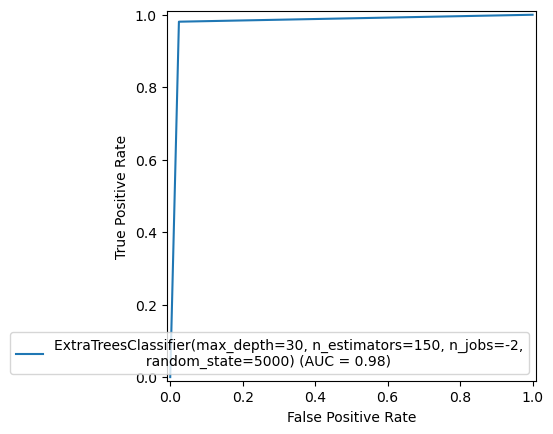

In [90]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=final_model)
display.plot()

In summary, using HR analytics helps us understand why employees leave their jobs. The model, with a strong 97% accuracy, digs into the reasons behind this, such as job satisfaction and how long someone has been with the company. By figuring out these factors and looking at the costs of losing employees, we can give companies useful insights. It is recommended to focus  on making work better for employees and using data to guide decisions. This way, companies can reduce the expenses and challenges that come with employees leaving, and create a happier, more stable workplace.